# Numpy module
- prounounced "NUM-pie" (doesn't rhyme with "lumpy")
- A __num__erical library for __py__thon
- Primary class provided is the "numpy array", or `ndarray` (N-dimensional array)

In [2]:
# traditionally give numpy a shorthand of "np"
# also typically just import the whole thing
import numpy as np

# Creating an array
The easiest way to create a numpy array is from a list. Call numpy's `array` method with an iterable as an argument:

In [3]:
first_array = np.array([1, 2, 3])
first_array

array([1, 2, 3])

Looks like a list, doesn't it? But there are important advantages. Numpy arrays:
- are __vectorized__ (this is amazing):
    - adding two arrays adds all of the matching elements (if they are the same size)
    - you can take the `sin` of the entire array at once with numpy's version of `sin`
- are __*extremely*__ fast (all the restrictions allow a deeper and lower-level languages take care of the numerical details at lightning speed

# Speed Comparison
Let's compute the sine of 100,000 elements with the `math` module's version of `sin`, and compare it to doing it with the vectorized arrays and `sin` from `numpy`.

In [4]:
import math
xs = [i for i in range(int(1e5))]
%timeit ys = [math.sin(x) for x in xs]

11.5 ms ± 61.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
new_xs = np.array(xs)
%timeit new_ys = np.sin(new_xs)

827 µs ± 15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Limitations of `numpy` arrays
There are some severe downsides to using `numpy` arrays, though. The two most obvious are that they:
- are of fixed size. There is no `append` method (this sucks)
- are composed of only one type of element (this sucks, but makes sense in most applications)

In [6]:
# try to append
test_array = np.array([0,1,2])
test_array.append(3)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [7]:
# try to add a non-integer to an integer array
test_array[1] = 'one'

ValueError: invalid literal for int() with base 10: 'one'

# Data Types
Evidently I can only use integers in a `test_array`. How did that get set? Could I do a numpy array of `float`s? `bool`s? `string`s?

In [8]:
float_array = np.array([0.0, 1.0, 2.0])
float_array

array([0., 1., 2.])

In [10]:
bool_array = np.array([True, True, False])
bool_array

array([ True,  True, False])

In [11]:
string_array = np.array(['numpy', 'is', 'great'])
string_array

array(['numpy', 'is', 'great'], dtype='<U5')

Whoa, what's that `dtype` thing in `string_array`?

## Data Types
`dtype` is referring to the __data type__ of the array. That is, what is the kind of stuff that is in the array. For `test_array`, `float_array`, and `bool_array`, it was evidently obvious enough what they held, so it isn't output.

But for `string_array`, the `dtype` designation is `'<U5'`, which roughly means "unicode strings of length less than or equal to 5. In general `dtype` is some string that encodes what type of data the array can expect. Let's try and sub in a string that is less than 5 characters and one that is greater:

In [13]:
# less than or equal to 5 characters, should be good
string_array[0] = 'UWEC'
string_array

array(['UWEC', 'is', 'great'], dtype='<U5')

In [14]:
# more than 5 characters: violation
string_array[2] = 'fabulous'
string_array

array(['UWEC', 'is', 'fabul'], dtype='<U5')

Uh oh... we didn't get an error, but it truncated our string! We must always be aware of the data types of our arrays. It's not just strings, though.

# Finding and setting the data type
Every `numpy` array has an attribute, `dtype`, that you can get at via something like

```python
    string_array.dtype # => '<U5'
```
When initializing an array, you can explicitly set the `dtype` to a proper data type string (you can look these up in the `numpy` documentation, but some basic ones are in table 6.2 of your book):
```python
    float_array = np.array([0.0, 1.0, 2.0], dtype='float64') # => 64-bit floats
```
This is useful when you don't want python to guess, or when you are first creating  an empty array, so python knows how much memory to allocate.

# Example: Short integers
Integer arrays can have size limits. For instance, if the data type is `'i8'`, then each element is an 8-bit integer (7 bits and one more for the sign). That is, some binary number between `-0b1111111` (=-127) and `+0b1111111` (=127). Technically, it can actually be -128, but we'll not get into those details. If you then try to put a larger integer than 127 in the array, it will truncate your result to the last 7 bits (plus the sign, I think)

In [16]:
int_array = np.array([0,1,2], dtype='int8')
int_array

array([0, 1, 2], dtype=int8)

Now let's try to assign a value to -129, which is not possible to represent in an 8-bit integer, and see what happens

In [22]:
# do this together in class

# Aside: 8-bit integers and Nuclear Gandhi
A popular myth states that in the original 1991 Civilization game, leaders were assigned an "aggression" value as an **unsigned integer** from 1 to 10, with 10 being the most aggressive.

In [33]:
leaders = ['Caesar', 'Gandhi', 'Lincoln', 'Napoleon']
aggression_vals = np.array([6, 1, 3, 7], dtype='uint8')
for leader, aggression_val in zip(leaders, aggression_vals):
    print(f'{leader:9s}: {aggression_val:d}')

Caesar   : 6
Gandhi   : 1
Lincoln  : 3
Napoleon : 7


# Aside: 8-bit integers and Nuclear Gandhi
Upon adopting the democracy government, an AI's aggression would drop by two values. Mahatma Gandhi (India) was the only leader with a built-in aggression of 1, but what happens when he adopts democracy?

In [35]:
aggression_vals[leaders.index('Gandhi')] -= 2
for leader, aggression_val in zip(leaders, aggression_vals):
    print(f'{leader:9s}: {aggression_val:d}')

Caesar   : 6
Gandhi   : 253
Lincoln  : 3
Napoleon : 7


![nuclear gandhi](Nuclear_Gandhi.png)

# This is a nightmare. Why do I have to track the data type?
This is where `numpy`'s ruthless efficiency comes from. By knowing *exactly* how large each element of an array is in memory, it can put all the elements right next to each other and access them trivially. Compare that to a list, which doesn't store data, but it stores references to other parts of memory, so the data is scattered all across your RAM. In short, being meticulous about the size of elements and the fixed length of an array is what gives `numpy` its power, and we just have to deal with that.

A common workaround when speed isn't that important is to first build a python list using `append`, and then (assuming the elements are all of compatabile data types), casting it into an array. Something like the following:

In [ ]:
first_ten_evens = []
for i in range(10):
    first_ten_evens.append(2 * i)
first_ten_evens = np.array(first_ten_evens)
first_ten_evens

# Creating sequences of numbers
A common need is to generate a sequence of numbers that span a range from some minimum to maximum. `numpy` gives us a few tools to make this dead simple.

## `arange`
Suppose you want to create a sequence of numbers from 1 to a million. How could we do it? We could use the example above to append to a list and then convert it, but `numpy` gives a quicker and more efficient way that doesn't rely on lists. It's the `arange` function. As the name implies, it is similar to the built in `range` function. If you give it one argument, it creates a list of "integers" from 0 up to (but not including) that number:

In [ ]:
first_range = np.arange(10)
first_range

In [ ]:
first_range.dtype

# More with `arange`
You can also specify a second argument. If you do that, the first argument becomes the first element, and the last argument becomes the excluded endpoint:

In [ ]:
second_range = np.arange(1987, 2021)
second_range

# Adding stride to `arange`
Finally, you can specify a step size with an optional third argument:

In [ ]:
election_years = np.arange(1788, 2021, 4)
election_years

## And strides can even by floats rather than integers!

In [ ]:
half_years = np.arange(2017, 2021, 0.5)
half_years

**Problem**: floats are imprecise; range may not behave as you expect!

# A better alternative:  `linspace`
The second, and perhaps more useful way to generate a sequence of numbers is `linspace` and its sad cousin, `logspace`. 

We saw `linspace` from back in handout/lab/problem set 7. But as a reminder, to use `linspace`, you provide a starting point and a stopping point, and it generates an array of evenly spaced numbers *including* the end point:

In [ ]:
phases = np.linspace(0, 2*np.pi)
phases

In [ ]:
len(phases)

# More with `linspace`
Note that we aren't limited to integers, and by default we got 50 points. As you may have guessed, an optional third argument specifies how many points to create. Let's use this to generate a plot of a sine curve:

In [ ]:
fine_phases = np.linspace(0, 2*np.pi, 1000) # 1,000 points!
sines = np.sin(fine_phases)

import matplotlib.pyplot as plt
plt.style.use('default') # not necessary, but ensures uniformity across computers
plt.plot(fine_phases, sines)

# Step Size from `linspace`
Perhaps you want the step size in addition to the steps themselves. That is, you want to know the difference between adjacent points. You could compute the difference one point from the next point, but you can also get it by setting the optional keyword argument `retstep` to true. Then two objects are returned by the function: the points and the step size, so you will need to "capture" both with a tuple assignment:

In [ ]:
fine_phases, dphi = np.linspace(0, 2 * np.pi, 1000, retstep=True)
dphi

# `logspace` gives equal spacing in the log of numbers
Finally, `logspace` works in exactly the same way as `linspace`, but the values you give are assumed to be powers of 10, and the resulting array will be equally spaced in logarithmic space. Perhaps an example is clearer:

In [ ]:
powers_of_10 = np.logspace(0, 10, 11)
powers_of_10

These aren't evenly spaced in linear space, but their logs are all evenly spaced. It's very useful when dealing with exponential quantities.

# Challenge: Linear and Logarithmic Spacing and Plotting (Solution at end)
Below is some fancy plotting code that will plot two data sets in two ways each. All panels will plot the function $y = x^3$. The left column will plot data on a linear scale, while the right column will plot the same data on a log-log scale. **Your task** is to set up four arrays:

- `xs_linear`: a linearly spaced set of 20 points spanning from one to a million
- `ys_linear`: the $y$ values for $y = x^3$, using `xs_linear` as your $x$ values
- `xs_log`: a logarithmically spaced set of 20 points spanning from one to a million
- `ys_log`: the $y$ values for $y = x^3$, using `xs_log` as your $x$ values

Empty dummy arrays are set up for you. You should replace those with your own code. Once you have the arrays set up, execute the cell and observe the plots. Can you see why logarithmically-spaced points can be very useful?

In [ ]:
xs_linear = np.array([])
ys_linear = np.array([])

xs_log = np.array([])
ys_log = np.array([])

# NO TOUCHIE BELOW HERE!
# don't touch this... magic multi-panel matplotlib witchcraft for the next handout!
fig, axes = plt.subplots(2, 2)
axes[0, 0].scatter(xs_linear, ys_linear)
axes[0, 1].scatter(xs_linear, ys_linear)
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')
axes[1, 0].scatter(xs_log, ys_log)
axes[1, 1].scatter(xs_log, ys_log)
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')

# add labels
options = ['linear', 'log']
for i in (0, 1):
    for j in (0, 1):
        axes[i, j].text(0.05, 0.95, f'{options[j]} axes\n{options[i]} spacing', ha='left', va='top', transform=axes[i, j].transAxes)
        axes[i, j].set_xlabel('$x$')
        axes[i, j].set_ylabel('$x^3$')

plt.tight_layout()

# Multi-dimensional Arrays
Create a 2D array (like a matrix) by converting a list of equal-length lists to `np.array`:

In [ ]:
matrix = np.array([[1,2,3], [4,5,6], [7,8,9]])
matrix

But beware! sub-lists need to have equal length so that array has a coherent **shape**. In this example, we just get an array with two elements, each of which are **lists** (note the `dtype`!)

In [ ]:
# sub-lists don't have equal length; numpy does its best, though
# notice dtype is now "object". The elements are themselves lists;
failed = np.array([[1,2,3], [4, 5]])
failed

# The shape of an array
The shape of a numpy array is a tuple of integers that gives the size of each dimension. The shape of a 1D array is just its length (as a singleton tuple). The shape of 3 × 4 matrix will be (3, 4), etc. You can access it as an attribute, rather than a method (so don't "call" it with parentheses).

In [ ]:
# 1D array
my_ints = np.arange(10)
print(my_ints)
np.arange(10).shape

In [ ]:
# 2D array from before
print(matrix)
matrix.shape

In [ ]:
# our failed 2D array from before, which is really just a 1D array
print(failed)
failed.shape

# Reshaping Arrays
We can re-shape an array using the `reshape` method, which creates a __new array__ (sort of). It does not change the original array. `resize` (not demoed here) changes the array in place.

In [ ]:
matrix2 = matrix.reshape((9,))
matrix2.shape

In [ ]:
matrix2

In [ ]:
matrix

# `reshape` and other methods create "views" on arrays
A **view** is another representation of the **same data**. Changes to the data in views will change the data in the original array!

In [ ]:
print(matrix)
print(matrix2)

In [ ]:
matrix2[-1] = 1000
print(matrix)
print(matrix2)

# Other useful attributes
- __shape__: array of dimnsions: the size of the array along each of its _axes_ (tuple of integers)
- __ndim__: number of axes (the "rank of the matrix")
- __size__: total number of elements in the array; same as the product of each integer in `shape`
- __dtype__: string representing the type of data held in the array

In [ ]:
print("The shape of\n {}\n is {}\n".format(matrix, matrix.shape))
print("The rank of\n {}\n is {}\n".format(matrix, matrix.ndim))
print("The size of\n {}\n is {}\n".format(matrix, matrix.size))
print("The data type of\n {}\n is {}".format(matrix, matrix.dtype))

# Other Ways of Creating Multi-dimensional Arrays
We have seen that we can turn lists of lists into multi-dimensional arrays. Two other useful functions exist, similar to how we used `arange`, `linspace`, and `logspace` for 1D arrays. These are `zeros` and `ones`.

`np.zeros` just takes a tuple representing the shape of the desired array (and an optional `dtype` argument) and creates an array of all zeros of that prescribed shape (and `dtype`).

In [ ]:
twenty_zeros = np.zeros((4, 5), dtype='int64')
twenty_zeros

In [ ]:
# "zero strings" are just the empty string
zero_strings = np.zeros((3, 3), dtype='<U32')
zero_strings

In [ ]:
# "zero bools" are just False
zero_bools = np.zeros((2, 3), dtype='bool')
zero_bools

# The lighter side of `zeros`: `ones`
`np.ones` does something similar, but uses 1 as the filler instead of zero.

In [ ]:
np.ones((2,2), dtype='float64')

In [ ]:
# string variant is a little less useful now
np.ones((2,3), dtype='<U12')

In [ ]:
# bools are now True
np.ones((4, 5), dtype='bool')

# Making arrays with the same shape as another array
The functions `np.zeros_like` and `np.ones_like` do what `np.zeros` and `np.ones` do, but instead of an explicit shape and `dtype`, they accept another array as a parameter and then create a new aray with the same shape and `dtype`.

In [ ]:
matrix

In [ ]:
np.zeros_like(matrix)

# Combining 1D techniques with `reshape`/`resize`
Note: we could combine things like `np.linspace` and `np.arange` and then using `reshape` (or `resize`) to get a multidimensional array, though the applications seem quite limited.

In [ ]:
# add one to get 1 through 9
np.arange(9).reshape((3, 3)) + 1

# Making an array based off of a function
Perhaps you need to create an array that just has the first 3 powers of the first 10 integers. Weird, but it doesn't allow us to use any of our previous tricks other than doing it by hand with lists. `np.fromfunction` has you covered.

You provide a function that takes as many arguments as the desired array has indices, as well as a shape.

In [39]:
# add one to both indices to get rid of the zero cases
product = lambda i, j: (i + 1)*(j + 1)
multiplication_table = np.fromfunction(product, (10, 10))
multiplication_table

array([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
       [  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.],
       [  3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.],
       [  4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.],
       [  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.],
       [  6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.],
       [  7.,  14.,  21.,  28.,  35.,  42.,  49.,  56.,  63.,  70.],
       [  8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.],
       [  9.,  18.,  27.,  36.,  45.,  54.,  63.,  72.,  81.,  90.],
       [ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]])

# Universal Functions
Basic arithmetic operations on numpy arrays happen element-wise. These operations include addition, subtraction, multiplication, and division. If perform an operation between a vector and a scalar, the scalar is broadcast to all elements of the scalar.

In [ ]:
np.ones(5) + np.ones(5)

In [ ]:
np.ones(5) + 1

# Mathematical Functions
numpy also provides a bunch of built-in mathematical operations that can operate on scalars _or_ numpy arrays, so numpy essentially supersedes the math module. 

The list is large, so consult the documentation, but basic ones like `np.sin`, `np.sqrt`, and `np.exp` should be obvious. Note that `np.log` is base $e$, while `np.log10` is base 10. 

In [ ]:
np.log10(np.arange(10) + 1)

# Indexing and Slicing
For 1D arrays, indexing and slicing works the same as they did for lists and tuples. For a single value, we de-reference with square brackets and putting the index of the desired element in the brackets, using negative numbers if we want to access items from the end of the array.

In [ ]:
int_array = np.arange(0, 10)
int_array

In [ ]:
# get "second" element (at index 2)
int_array[2]

In [ ]:
# get second to last element
int_array[-2]

# Slicing
To slice (to get sub-arrays), again we can use the conventions of lists and tuples. We again use square brackets and then put an optional starting index (assumed to be the zeroth index if omitted), a colon, and an optional ending position which will *not* be included. If the ending index is left off, all elements to the end of the array are included. 

__The returned array does not own its data. Any changes to these "slices" will propagate back up to the main array.__ This is different from how lists work.

In [ ]:
# first three elements. Note that 3 is not included
int_array[0:3]

# Strides in Slices
We can also include a third integer in our range that specifieds the stride, or how far to go to fetch the next element. By default this is 1, meaning gather each element in sequence. This is most useful for going backwards through the array, but it can also be useful if you need every third value, for example.

In [ ]:
# every third element. Take all elements (the first naked colon),
# and then only every third element (last ":3")
int_array[::3]

In [ ]:
# getting the reversed array
int_array[::-1]

# How *NOT* to copy arrays

In [ ]:
# the entire array, omitting both starting and ending indices;
# This DOESN'T make a copy like it did for lists, it just provides a "view" into the existing data
# this cuts down on memory usage in large datasets, but you need to be aware of it
int_array[:]

In [ ]:
second_array = int_array[:] # make a "copy"
second_array[0] = 11 # change that copy
print("second array: {}".format(second_array))
print("first array: {}".format(int_array))
print("uh oh!")

# How to copy arrays successfully
"copying" via our old way didn't work! We only get a new **view** into the old array, so changes to the new array affect the old one. Instead, use numpy's `copy` function.

In [ ]:
# first, "fix" our original array
int_array[0] = 0

# now copy the real way
second_array = np.copy(int_array[:])
second_array[0] = 11 # change that copy
print("second array: {}".format(second_array))
print("first array: {}".format(int_array))
print("that's more like it!")

# Accessing Elements in multi-dimensional arrays
For multi-dimensional arrays, we need to provide two indices or ranges for de-referencing or slicing. We separate these by commas. To get the zeroth element of the zeroth row, we would use `[0,0]`.

In [40]:
two_d_array = np.arange(1,7).reshape(3, 2)
two_d_array

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
# getting zeroth row, zeroth column
two_d_array[0, 0]

To get the first row, we are really saying we want every column but only the first row, so in the "column" place (the second index), we just put a colon.

In [ ]:
# getting the second row
two_d_array[1,:]

Or we could get just part of one column. Say the last two rows of the last column

In [ ]:
two_d_array[-2:, -1]

Finally, we could get another multidimensional array if we specified it. Here we'll just take all of the first two rows

In [41]:
two_d_array[:2,:]

array([[1, 2],
       [3, 4]])

# Challenge: Slicing a 2D Array (Solution at end)
Below is a 3 × 3 array of integers (`first_9`). Which has the numbers 1 to 9, increasing left to right and top to bottom. Slice it to get the following sub-array:
$$\begin{array}{cc} 1 & 2 \\7 & 8\end{array}$$
You can do this with one 2D slice of `first_9`.

In [48]:
first_9 = np.arange(1, 10).reshape(3, 3)

array([[1, 2],
       [7, 8]])

# Advanced Indexing and Masking
We can also "cherry pick" elements with arbitrary constraints. Say I want the elements at indexes 1, 4, and 5. I can make a list or tuple out of those indices, and then pass that as the "index" when de-referencing.

In [ ]:
evens = int_array * 2
inds = [1, 4, 5]
some_evens = evens[inds]
some_evens

Crucially, __these are new arrays that own their own data__. Changes you make to these sub-arrays will be contained in the sub-arrays. I'm not certain why this choice was made, but there it is.

In [ ]:
some_evens[2] = -1
print('evens: {}'.format(evens))
print('some_evens: {}'.format(some_evens))

# Masks
Perhaps more useful is using arrays of bools to index. Instead of an index or range, we put a whole numpy array of bools in the square brackets that is of the same shape as the numpy array itself. Every position that is `True` will be returned, and `False` ones will be skipped.

But how do I generate these arrays? Since boolean operations are vectorized, we can use the array itself (or other similar arrays) to create them. This array of booleans is called a __mask__.

Let's see an example. Starting with an array of negative integers from -20 to 20, let's isolate the ones that are positive first.

In [ ]:
starter = np.arange(-20, 21)
starter

In [ ]:
positive_mask = starter > 0
positive_mask

In [ ]:
positive_starter = starter[positive_mask]
positive_starter

# Mask Example: Selecting Multiples of 5
Now let's get to the multiples of five only from the original array of integers from -20 to +20:

In [ ]:
mult_5_mask = (starter % 5 == 0)
mult_5_mask

In [ ]:
mult_5_starter = starter[mult_5_mask]
mult_5_starter

# Combining Masks
We can use logical operators like not, and, and or to combine masks to new, more complicated constraints. To negate a boolean array, affix `~` in front of it. To combine two arrays in an "and" sense, put `&` between them (and probably you should put parentheses around the masks if they are literals, like `(starter > 0) & (starter % 5 == 0)`, or else the parser has trouble understanding what you mean. And to combine to masks in an "or" sense, use the pipe (`|`) character.

In [ ]:
# elements that are non-positive
starter[~positive_mask]

In [ ]:
# elements that are both multiples of five AND postive
starter[positive_mask & mult_5_mask]

In [ ]:
# elements that are multiples of five OR non-positive
starter[mult_5_mask | (~positive_mask)]

# Meshes
Sometimes we will want to deal with a mesh of values. By "mesh", I mean a set of $(x, y)$ points. This may seem easy, but it's actually quite tricky. We need an array of $x$ coordinates that has the same shape as an array of $y$ coordinates, and each array contains an $x$ and $y$ coordinate that together make up all the points in some region of the $x-y$ plane. Finally, we might want a third array that, for example, contains all the values of a multi-dimensional function.

As a concrete example, let's say we want to have an array of values of the function

$$ f(x, y) = \sin \left(\sqrt{x^2 + y^2}\right) $$

And I'd like to be able to plot them. Not only do I need the values of the function themselves, but I probably also want values for the $x$ and $y$ values. Enter `np.meshgrid`. We give it $x$ values and $y$ values, and it gives us the desired multi-dimensional arrays for alll ordered pairs.

# Creating the mesh for $f(x,y) = \sin\left(\sqrt{x^2 + y^2}\right)$
- `x` and `y` are the coordinates of $x$ and $y$ that we want. Think of them as the tick marks on the coordinate axes
- `X` and `Y` are 2D arrays that have the $x$ and $y$ coordinates at each point in the 2D space

In [ ]:
x = np.linspace(-5, 5, 5)
y = np.linspace(-5, 5, 5)
X, Y = np.meshgrid(x, y)
print("X:\n{}".format(X))
print("Y:\n{}".format(Y))

Notice how the values of `X` increase along a single row, while those of `Y` increase along a given column. Now we can use vectorization to get all the values of our function in one line.

# Creating the $Z$ values for $f(x,y) = \sin(\sqrt(x^2 + y^2))$
Vectorization for the win! This will create a 2D array of $z$ values using the mesh grid we have already created. `numpy` is beautiful, isn't it?

In [ ]:
Z = np.sin(np.sqrt(X**2 + Y**2))
Z

# Visualizing $f(x,y)=\sin\left(\sqrt{x^2+y^2}\right)$ with `imshow`
`pylab`/`matplotlib` have a function called `imshow` that takes a 2D array and assigns a color scale to the values, displaying an "image". We just feed it `Z`, and it converts its rows and columns to colored pixels.

In [ ]:
pylab.imshow(Z)

Hmm.. that's gross. Let's expand our range a bit.

# Getting a Higher Resolution Mesh
Instead of a 5 × 5 mesh, lets go with 100 × 100, and over a larger range (both $x$ and $y$ go from –10 to 10 now). We need only change the number of points in `x` and `y`.

Note, the axes labels only show the *indices* of `Z`. We would have to use a different function to incorporate the actual coordinate positions encoded in `X` and `Z`. Still, you get the point.

In [ ]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))
pylab.imshow(Z)

# Record Arrays (Structured Arrays)
- Use a 2D `numpy` array as a database
- Each **row** is a "record", with different data types for each **column**
- Columns can be named for more semantic access

In [ ]:
array_length = 1000

# specify data type with a list of tuples
# first element of each tuple is the name, second is the actual data type
dt = np.dtype([('x', 'float64'), ('y', 'float64')])
sine_data = np.zeros(array_length, dtype=dt)
sine_data['x'] = np.linspace(0, 4 * np.pi, array_length)
sine_data['y'] = np.sin(sine_data['x'])

In [ ]:
pylab.plot(sine_data['x'], sine_data['y'])

# Example: Customer Database
Want a database of customers that keeps track of the following pieces of data:
- last name (string length < 60)
- first name (string length < 60)
- joined (datetime)
- id (integer)

In [ ]:
dt = np.dtype([('last', '<U60'), ('first', '<U60'), ('joined', 'datetime64[D]'), ('id', 'int64')])
customers = np.zeros(50, dtype=dt)
customers.dtype.names

In [ ]:
customers

# Adding a first record
Each record (a row in the table) is a tuple of data whose datatypes match up properly with the corresponding columns

In [ ]:
customers[0] = ('Wolf', 'William', '2020-04-20', 1)
customers

# Searching for a record by one of the columns

In [ ]:
customers[customers['last'] == 'Wolf']

# Saving and Loading Files (I/O: Input/Output)

Writing data:
- `np.save` (binary file)
- `np.savetxt` (text file)

In [ ]:
np.save('customers_save', customers)

In [ ]:
np.savetxt('customers_save.txt', customers, fmt='%30s, %30s, %10s, %10i')

# Loading Data
- `np.load` (binary file; opposite of `np.save`)
- `np.loadtxt` (opposite of `np.savetxt`)
- `np.genfromtxt` (more powerful version of `loadtxt`)
- Example: look at [history.data](/view/history.data)

In [ ]:
star_history = np.genfromtxt('history.data', skip_header=5, names=True)
star_history.dtype.names

# The Payoff: Effortless and clear access to data columns!

In [ ]:
pylab.plot(star_history['star_age'], star_history['log_L'])®
pylab.xlabel('Star Age [years]')
pylab.ylabel('$\log L/L_\odot$')

In [ ]:
pylab.plot(star_history['star_age'], star_history['star_mass'])
pylab.xlabel('Star Age [years]')
pylab.ylabel('Star Mass [$M_\odot$]')

# Challenge: Linear and Logarithmic Spacing and Plotting SOLUTION
Below is some fancy plotting code that will plot two data sets in two ways each. All panels will plot the function $y = x^3$. The left column will plot data on a linear scale, while the right column will plot the same data on a log-log scale. **Your task** is to set up four arrays:

- `xs_linear`: a linearly spaced set of 20 points spanning from one to a million
- `ys_linear`: the $y$ values for $y = x^3$, using `xs_linear` as your $x$ values
- `xs_log`: a logarithmically spaced set of 20 points spanning from one to a million
- `ys_log`: the $y$ values for $y = x^3$, using `xs_log` as your $x$ values

Empty dummy arrays are set up for you. You should replace those with your own code. Once you have the arrays set up, execute the cell and observe the plots. Can you see why logarithmically-spaced points can be very useful?

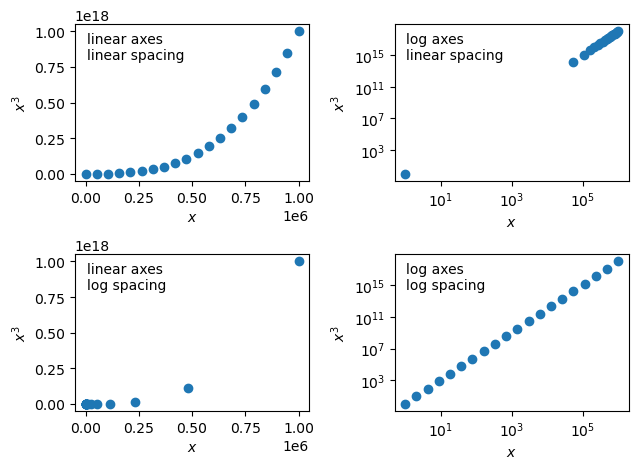

In [52]:
xs_linear = np.linspace(1, 1e6, 20)
ys_linear = xs_linear**3

xs_log = np.logspace(0, 6, 20)
ys_log = xs_log**3

# NO TOUCHIE BELOW HERE!
# don't touch this... magic multi-panel matplotlib witchcraft for the next handout!
fig, axes = plt.subplots(2, 2)
axes[0, 0].scatter(xs_linear, ys_linear)
axes[0, 1].scatter(xs_linear, ys_linear)
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')
axes[1, 0].scatter(xs_log, ys_log)
axes[1, 1].scatter(xs_log, ys_log)
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')

# add labels
options = ['linear', 'log']
for i in (0, 1):
    for j in (0, 1):
        axes[i, j].text(0.05, 0.95, f'{options[j]} axes\n{options[i]} spacing', ha='left', va='top', transform=axes[i, j].transAxes)
        axes[i, j].set_xlabel('$x$')
        axes[i, j].set_ylabel('$x^3$')

plt.tight_layout()

# Challenge: Slicing a 2D Array SOLUTION
Below is a 3 × 3 array of integers (`first_9`). Which has the numbers 1 to 9, increasing left to right and top to bottom. Slice it to get the following sub-array:
$$\begin{array}{cc} 1 & 2 \\7 & 8\end{array}$$

In [48]:
first_9 = np.arange(1, 10).reshape(3, 3)
# Want every other row starting from the top, and everything but the last column
first_9[::2,:-1]

array([[1, 2],
       [7, 8]])